In [1]:
from pybit.unified_trading import HTTP
import pandas as pd
import pandas_ta as ta
import numpy as np
from time import sleep
from asdf import (
    get_dataframe,
    get_full_dataframe,
    get_signal_for_candle,
    SignalType,
    Signal,
)
from decouple import config
import matplotlib.pyplot as plt
from constants import API_KEY, SECRET_KEY, TAKE_PROFIT, STOP_LOSS, SYMBOL, SCALE, RANGE



session = HTTP()
position_opened = False

df = get_dataframe(session, SYMBOL, SCALE, RANGE)
df = get_full_dataframe(df)

signals: [Signal] = []
current_signal = None


for i in range(0, len(df.index) - 2):
    low, high = df["lowest"].iloc[i - 1], df["highest"].iloc[i - 1]
    # probable signal on current candle
    signal: Signal = get_signal_for_candle(
        df,
        i,
        bool(current_signal),
        take_profit=TAKE_PROFIT,
        stop_loss=STOP_LOSS,
    )
    if signal.type == SignalType.BUY:
        print(signal)
        signals.append(signal)
        current_signal = signal
        # BUY
    elif current_signal:
        if low < current_signal.stop_loss:
            print("STOP LOSS")
            current_signal = None
        elif high > current_signal.take_profit:
            print("TAKE_PROFIT")
            current_signal = None
    # signal: Signal = get_signal_for_candle(df, i, False)
    # if signal.type == SignalType.BUY:
    #     signals.append(signal)
    #     position_opened = True
    # elif signal.type == SignalType.SELL:
    #     signals.append(signal)
    #     position_opened = False
    # else:
    #     pass

/tmp/ipykernel_41211/1223973487.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Time: 2024-02-27 21:30:00, type: SignalType.BUY, entry: 1.9007, tp: 1.995735, sl: 1.8531825
STOP LOSS
Time: 2024-02-28 23:00:00, type: SignalType.BUY, entry: 1.9088, tp: 2.0042400000000002, sl: 1.86108
TAKE_PROFIT
Time: 2024-03-01 02:00:00, type: SignalType.BUY, entry: 1.9877, tp: 2.087085, sl: 1.9380075
TAKE_PROFIT
Time: 2024-03-04 07:00:00, type: SignalType.BUY, entry: 2.0142, tp: 2.11491, sl: 1.9638450000000003
STOP LOSS
Time: 2024-03-05 03:30:00, type: SignalType.BUY, entry: 2.0073, tp: 2.107665, sl: 1.9571174999999998
TAKE_PROFIT
Time: 2024-03-09 02:30:00, type: SignalType.BUY, entry: 2.1356, tp: 2.2423800000000003, sl: 2.0822100000000003
STOP LOSS
Time: 2024-03-14 02:30:00, type: SignalType.BUY, entry: 2.1129, tp: 2.2185449999999998, sl: 2.0600775
STOP LOSS


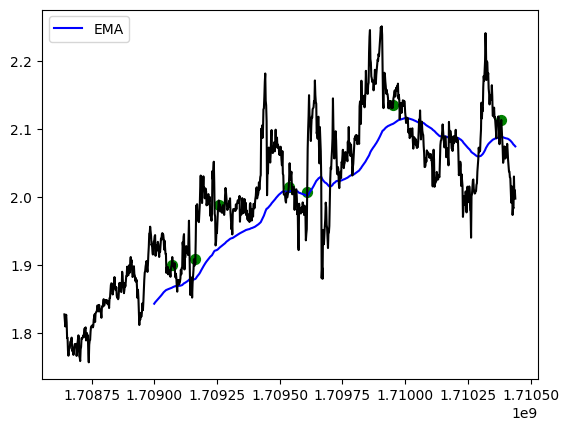

In [2]:
# plt.plot(df["MACDs_12_26_9"], label="signal", color="red")
plt.plot(df["EMA_200"], label="EMA", color="blue")
plt.plot(df['close'], color='black')
for signal in signals:
    if signal.type == SignalType.BUY:
        plt.scatter(signal.unix, signal.entry_point, color='green', s=50, marker='o')
    else:
        plt.scatter(signal.unix, signal.entry_point, color='red', s=50, marker='o')
plt.legend()
plt.show()

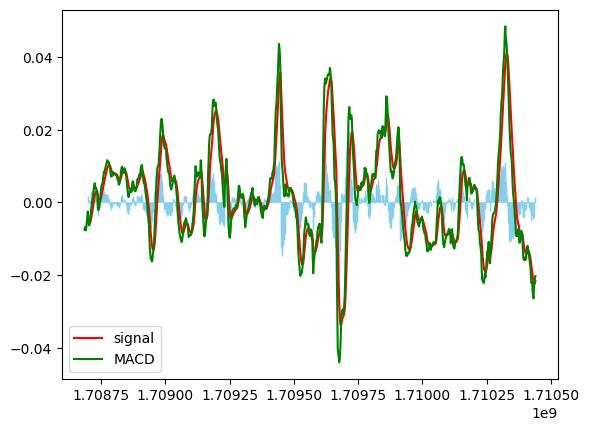

In [3]:
plt.plot(df['MACDs_12_26_9'], label='signal', color='red')
plt.plot(df['MACD_12_26_9'], label='MACD', color='green')
# plt.plot(df['MACDh_12_26_9'], label='histogram', color='blue')
plt.bar(df.index, df['MACDh_12_26_9'], color='skyblue', edgecolor='skyblue')
plt.legend()
plt.show()